In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

train_dir='/content/drive/My Drive/cats_and_dogs_small/train/'
val_dir='/content/drive/My Drive/cats_and_dogs_small/validation'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow import keras
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range =0.2,height_shift_range =0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_dir,target_size=(150, 150),batch_size=20,class_mode='binary')


Found 4008 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 111s 1s/step - loss: 0.6300 - acc: 0.6355 - val_loss: 0.5878 - val_acc: 0.6840
Epoch 2/10
100/100 [==============================] - 111s 1s/step - loss: 0.6187 - acc: 0.6454 - val_loss: 0.5993 - val_acc: 0.6620
Epoch 3/10
100/100 [==============================] - 111s 1s/step - loss: 0.6121 - acc: 0.6564 - val_loss: 0.5797 - val_acc: 0.6920
Epoch 4/10
100/100 [==============================] - 110s 1s/step - loss: 0.6062 - acc: 0.6640 - val_loss: 0.5748 - val_acc: 0.6860
Epoch 5/10
100/100 [==============================] - 110s 1s/step - loss: 0.6117 - acc: 0.6494 - val_loss: 0.5564 - val_acc: 0.7230
Epoch 6/10
100/100 [==============================] - 110s 1s/step - loss: 0.5917 - acc: 0.6700 - val_loss: 0.5534 - val_acc: 0.7100
Epoch 7/10
100/100 [==============================] - 110s 1s/step - loss: 0.5815 - acc: 0.6806 - val_loss: 0.5439 - val_acc: 0.7180
Epoch 8/10
100/100 [==============================] - 110s 1s/step - 

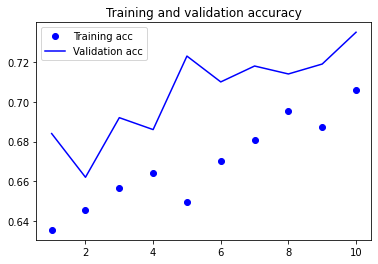

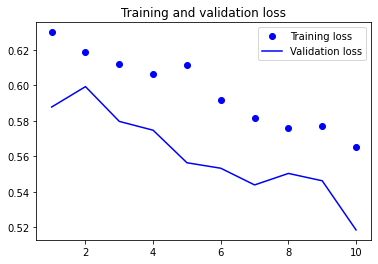

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
